Project 3: Data Analytics - Exploratory Data Analysis (EDA) on Titanic Dataset


Description: Performing EDA on the Titanic dataset, examining missing values, distribution of data, and relationships between features. 
Using basic visualizations like histograms and correlation heatmaps.


 Step 1:Loading and Inspecting the Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = r"C:\Users\HP\Desktop\INTERNSHIP\Titanic.csv"
titanic_df = pd.read_csv(file_path)

# Quick overview
print(titanic_df.head())
print(titanic_df.info())
print(titanic_df.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

Step 2:Checking for Missing Values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


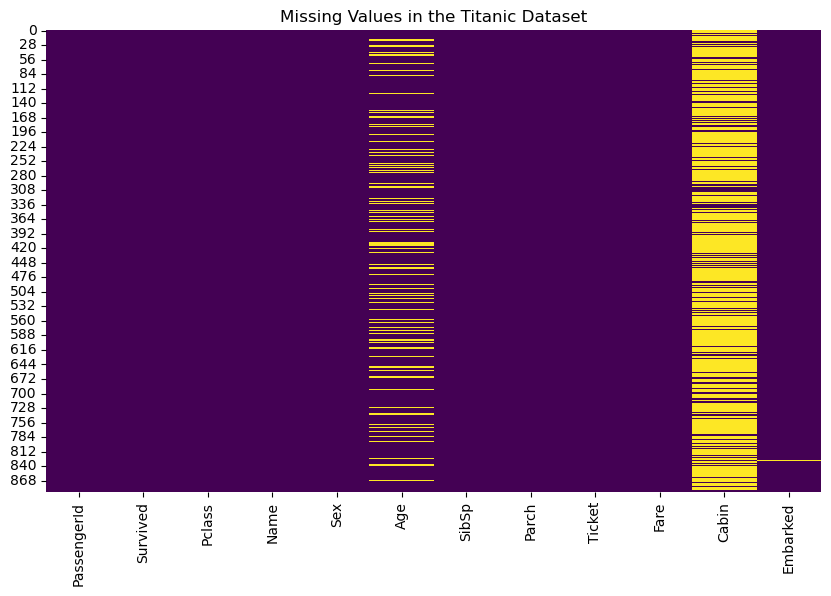

In [3]:
# Check for missing values
missing_values = titanic_df.isnull().sum()
print(missing_values)

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Titanic Dataset')
plt.show()


Step 3:Analyzing Data Distribution

C:\Users\HP\AppData\Local\Temp\ipykernel_8180\3115151955.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=titanic_df, palette='pastel')


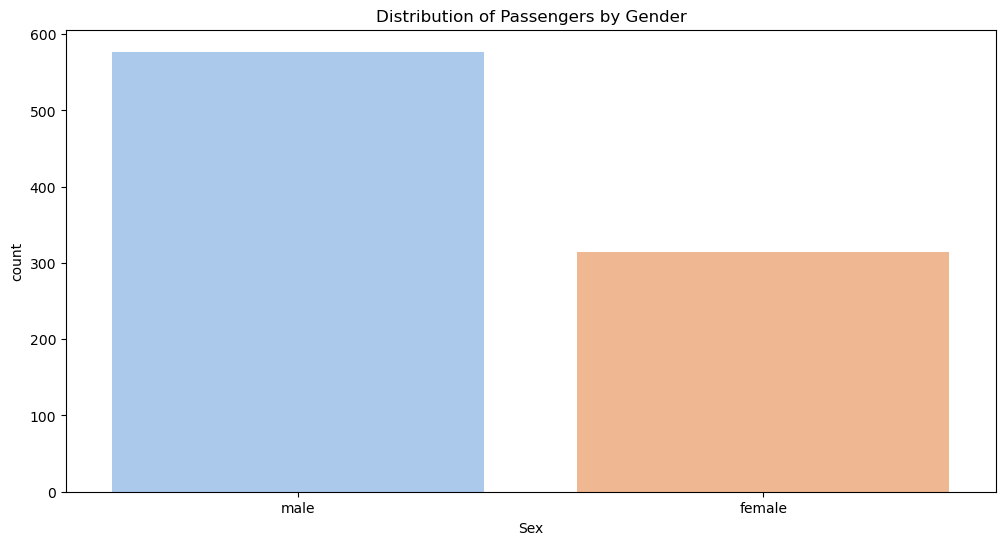

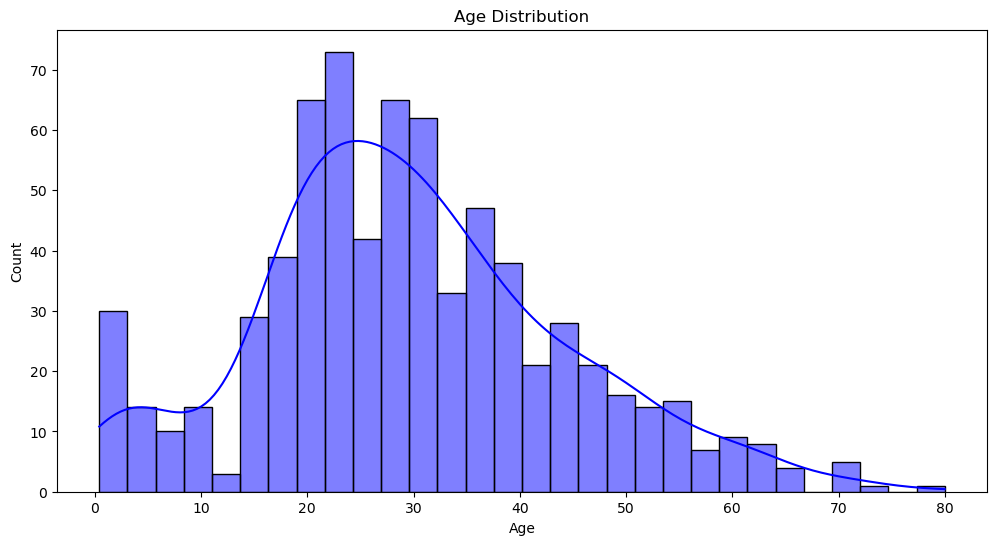

In [5]:
# Categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(x='Sex', data=titanic_df, palette='pastel')
plt.title('Distribution of Passengers by Gender')
plt.show()

# Numerical variables
plt.figure(figsize=(12, 6))
sns.histplot(titanic_df['Age'].dropna(), bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.show()


Step 4:Exploring Relationships Between Features

C:\Users\HP\AppData\Local\Temp\ipykernel_8180\2993802340.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=titanic_df, palette='coolwarm')


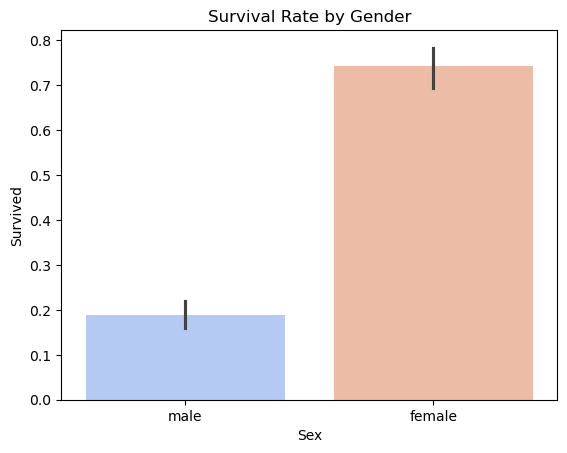

C:\Users\HP\AppData\Local\Temp\ipykernel_8180\2993802340.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=titanic_df, palette='viridis')


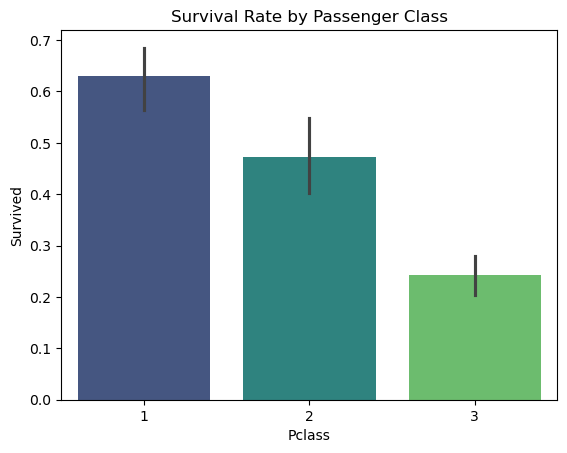

C:\Users\HP\AppData\Local\Temp\ipykernel_8180\2993802340.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=titanic_df, palette='Set2')


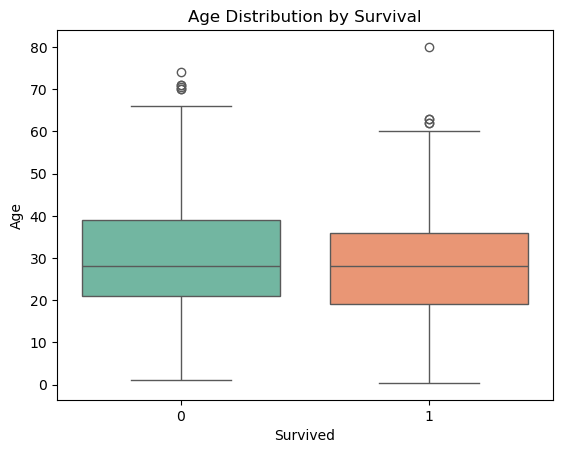

In [7]:
# Survival by gender
sns.barplot(x='Sex', y='Survived', data=titanic_df, palette='coolwarm')
plt.title('Survival Rate by Gender')
plt.show()

# Survival by class
sns.barplot(x='Pclass', y='Survived', data=titanic_df, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.show()

# Age distribution by survival
sns.boxplot(x='Survived', y='Age', data=titanic_df, palette='Set2')
plt.title('Age Distribution by Survival')
plt.show()


Step 5:Correlation Analysis

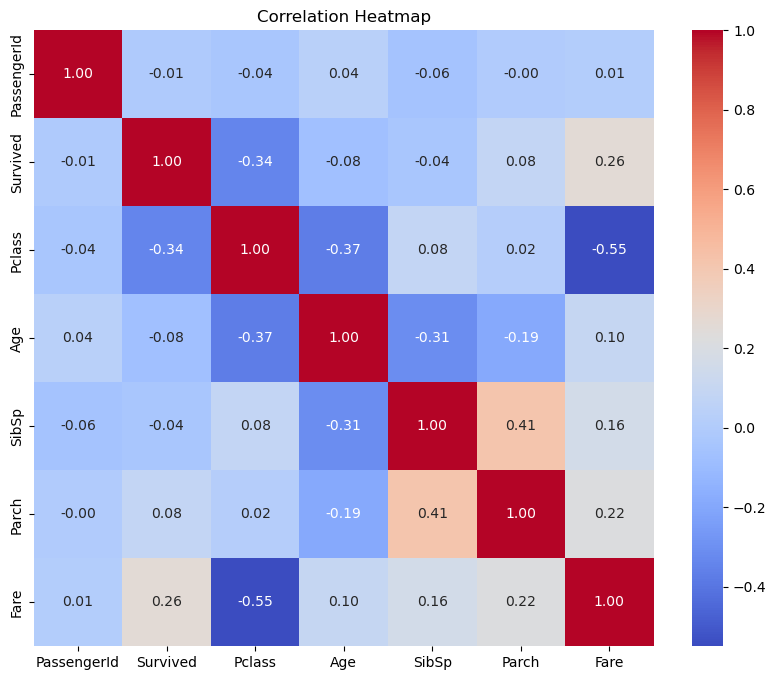

In [11]:
# Select only numeric columns
numeric_df = titanic_df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Step 6:Handling Missing Data

In [23]:
# Impute missing Age with median
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

# Impute missing Embarked with mode (most frequent value)
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])
# Check if 'Cabin' column exists before attempting to drop it
if 'Cabin' in titanic_df.columns:
    titanic_df = titanic_df.drop('Cabin', axis=1)

# Verify no missing data
print(titanic_df.isnull().sum())



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Project 4: Classification - Logistic Regression on the Titanic Dataset

Description: Build a logistic regression model to predict survival on the Titanic based on passenger features like age, sex, and class.


Step 1:Importing Libraries and Loading Dataset

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = r"C:\Users\HP\Desktop\INTERNSHIP\Titanic.csv"
titanic_df = pd.read_csv(file_path)

# Check the structure of the dataset
print(titanic_df.head())
print(titanic_df.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

Step 2:Data Preprocessing

In [29]:
# Impute missing values (Age, Embarked)
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

# Convert categorical features to numeric
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)  # Convert Embarked to dummies

# Drop unnecessary columns
titanic_df = titanic_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Check the preprocessed data
print(titanic_df.head())


   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    0  22.0      1      0   7.2500   
1            2         1       1    1  38.0      1      0  71.2833   
2            3         1       3    1  26.0      0      0   7.9250   
3            4         1       1    1  35.0      1      0  53.1000   
4            5         0       3    0  35.0      0      0   8.0500   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


Step 3: Spliting Data into Features and Target

In [31]:
# Define features and target
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the data
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (712, 9), Testing set: (179, 9)


Step 4:Feature Scaling

In [33]:
# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the scaled data
print(X_train_scaled[:5])


[[-0.45306593 -1.61413602 -0.7243102   1.25364106 -0.47072241 -0.47934164
  -0.07868358 -0.30335547  0.59248936]
 [ 1.11387354 -0.40055118 -0.7243102  -0.47728355 -0.47072241 -0.47934164
  -0.37714494 -0.30335547  0.59248936]
 [-0.25427511  0.81303367 -0.7243102   0.21508629 -0.47072241 -0.47934164
  -0.47486697 -0.30335547  0.59248936]
 [ 1.00083562  0.81303367 -0.7243102  -0.24649361  0.37992316 -0.47934164
  -0.47623026 -0.30335547  0.59248936]
 [ 1.42570229  0.81303367  1.38062393 -1.78509326  2.93185988  2.04874166
  -0.02524937 -0.30335547  0.59248936]]


Step 5:Building and Training Logistic Regression Model

In [35]:
# Create Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8044692737430168
Confusion Matrix:
[[89 16]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
Step 6: Visualizing the Confusion Matrix

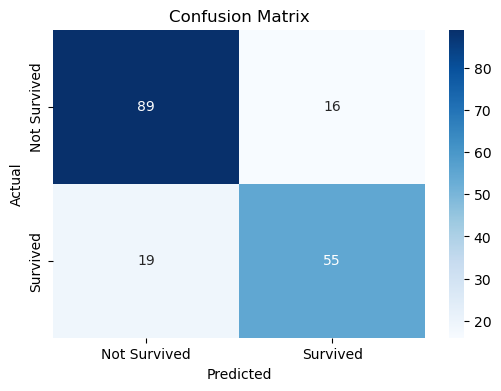

In [37]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
